epoch=    0   weight1.item()= 0.294 weight2.item()= 0.294 weight3.item()= 0.297 bias.item()= 0.003 cost= 29661.800781
epoch=  100   weight1.item()= 0.674 weight2.item()= 0.661 weight3.item()= 0.676 bias.item()= 0.008 cost= 1.563628
epoch=  200   weight1.item()= 0.679 weight2.item()= 0.655 weight3.item()= 0.677 bias.item()= 0.008 cost= 1.497595
epoch=  300   weight1.item()= 0.684 weight2.item()= 0.649 weight3.item()= 0.677 bias.item()= 0.008 cost= 1.435044
epoch=  400   weight1.item()= 0.689 weight2.item()= 0.643 weight3.item()= 0.678 bias.item()= 0.008 cost= 1.375726
epoch=  500   weight1.item()= 0.694 weight2.item()= 0.638 weight3.item()= 0.678 bias.item()= 0.009 cost= 1.319507
epoch=  600   weight1.item()= 0.699 weight2.item()= 0.633 weight3.item()= 0.679 bias.item()= 0.009 cost= 1.266222
epoch=  700   weight1.item()= 0.704 weight2.item()= 0.627 weight3.item()= 0.679 bias.item()= 0.009 cost= 1.215703
epoch=  800   weight1.item()= 0.709 weight2.item()= 0.622 weight3.item()= 0.679 bias

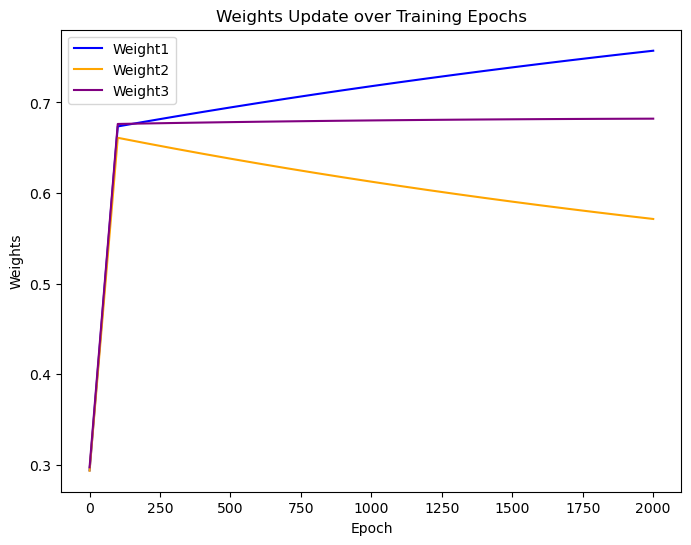

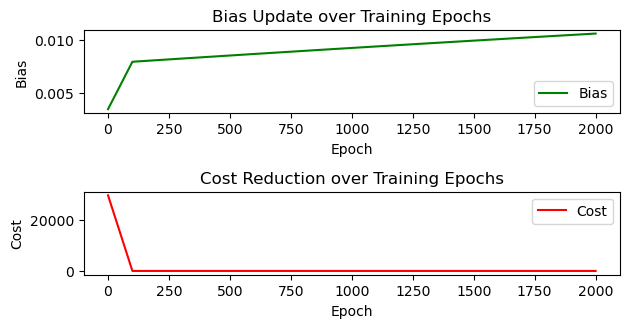

In [1]:
# 기본세팅
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_label = torch.FloatTensor([[152], [185], [180], [196], [142]])



# 모델 parameter 초기화
weight1 = torch.nn.Parameter(torch.zeros(1))
weight2 = torch.nn.Parameter(torch.zeros(1))
weight3 = torch.nn.Parameter(torch.zeros(1))
bias = torch.nn.Parameter(torch.zeros(1))


# Optimizer 설정
learning_rate = 1e-5
opt = optim.SGD([weight1,weight2,weight3,bias], lr=learning_rate)

# visualize를 위한 변수설정 
epochs = 2000
epoch_lst = []
weight1_lst = []
weight2_lst = []
weight3_lst = []
bias_lst = []
cost_lst = []

# 트레이닝
for epoch in range(epochs+1):
    
    # y 예측값 계산
    y_predict = (weight1 * x1_train) + (weight2 * x2_train) + (weight3 * x3_train) + bias
    
    # 실제 값과의 차이계산(cost)
    cost = torch.mean((y_label-y_predict)**2)
    
    # cost 로 y_predict 개선
    opt.zero_grad()     # gradient를 항상 0 으로 초기화
    cost.backward()     # 비용함수 미분
    opt.step()          # weight, bias 업데이트    

    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print(f"{epoch= :4,d}   {weight1.item()= :5.3f} {weight2.item()= :5.3f} {weight3.item()= :5.3f} {bias.item()= :5.3f} {cost= :.6f}")
        epoch_lst.append(epoch)
        weight1_lst.append(weight1.item())
        weight2_lst.append(weight2.item())
        weight3_lst.append(weight3.item())
        bias_lst.append(bias.item())
        cost_lst.append(cost.item())

# weight 그래프
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.plot(epoch_lst, weight1_lst, label="Weight1", color="blue")
plt.plot(epoch_lst, weight2_lst, label="Weight2", color="orange")
plt.plot(epoch_lst, weight3_lst, label="Weight3", color="purple")
plt.xlabel("Epoch")
plt.ylabel("Weights")
plt.title("Weights Update over Training Epochs")
plt.legend()
plt.show()


# Bias 그래프
plt.subplot(3, 1, 2)
plt.plot(epoch_lst, bias_lst, label="Bias", color="green")
plt.xlabel("Epoch")
plt.ylabel("Bias")
plt.title("Bias Update over Training Epochs")
plt.legend()

# Cost 그래프
plt.subplot(3, 1, 3)
plt.plot(epoch_lst, cost_lst, label="Cost", color="red")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Reduction over Training Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# 학습된 가중치와 바이어스 출력
print(f"Trained weights - w1: {weight1.item()}, w2: {weight2.item()}, w3: {weight3.item()}, bias: {bias.item()}")

# 새로운 데이터 입력
new_x1 = torch.FloatTensor([[75]])  # 예를 들어, 첫 번째 입력 변수
new_x2 = torch.FloatTensor([[85]])  # 두 번째 입력 변수
new_x3 = torch.FloatTensor([[78]])  # 세 번째 입력 변수

# 예측 계산
with torch.no_grad():  # 그래디언트 계산 비활성화 (예측 시 필요 없음)
    prediction = new_x1 * weight1 + new_x2 * weight2 + new_x3 * weight3 + bias
    print(f"Prediction for input (75, 85, 78): {prediction.item()}")


Trained weights - w1: 0.7570479512214661, w2: 0.5713932514190674, w3: 0.682076632976532, bias: 0.010596536099910736
Prediction for input (75, 85, 78): 158.55958557128906


In [5]:
print(weight1)

Parameter containing:
tensor([0.7570], requires_grad=True)
